# **Sneezy defeating Google Recaptcha**






## Task

Thema: Eine interessante und lehrreiche Datenanalyse auf einem von Ihnen wählbaren Datenset

Einschränkung: Keines der "klassischen" Datensets aus scikit-learn oder Keras.
Die Arbeit soll Ihre Kompetenzen im Bereich Maschinelles Lernen demonstrieren.
Die Arbeit soll die Bereiche "Domainverständnis", "Datenvorverarbeitung", "Analyse" und "Visualisierung" abdecken.
Sie können sich an anderen Arbeiten orientieren, müssen das Gelernte dann aber auf Ihren gewählten Analysegegenstand übertragen.
Verwendete Quellen müssen im Notebook angegeben werden.
Format: Ein vollständiges und in sich abgeschlossenes Jupyter Notebook

Das vollständig ausgeführte Jupyter Notebook ist zusätzlich auch als PDF-Datei einzureichen.
Falls die analysierten Daten zu umfangreich sind um sie mitabzugeben, reicht ein Link auf das Datenset.
Gruppengröße: 4 Personen (in Sonderfällen 3 Personen)

Bearbeitungszeitraum: **16.08 - 08.09.2023**

**23.08: Einreichung einer Projektskizze** (ca. eine DIN A4-Seite): untersuchte Daten, gewählte Fragestellung, geplantes Vorgehen, Aufgabenverteilung in der Gruppe

**30.08: Abgabe eines Zwischenstands** (lauffähiges Jupyter Notebook) und eines Zwischenberichts (ca. eine DIN A4-Seite): erreichter Stand, aufgetretene Herausforderungen, begründete Abweichungen von der Projektskizze

**08.09: Abgabe der finalen Version (vollständiges Jupyter Notebook + Erklärung)**
Erklärung: Unterschriebene Eigenständigkeitserklärung + Aufschlüsselung der Arbeitsaufteilung innerhalb der Gruppe (Hauptverantwortlichkeiten für Bestandteile + individueller Beitrag in Prozent der Gesamtleistung)

Arbeitsumfang: 40 - 50 Arbeitsstunden pro Person

Bewertungskriterien laut Masterhausarbeitsvorlage:

Gliederung der Arbeit / Aufbau und Darstellung der Problemstellung / Systematik / Struktur ("roter Faden")
Wissenschaftlichkeit / Inhaltliche Vollständigkeit und Richtigkeit / Themenrelevanz / Quellenarbeit / Eigenleistung
Klarheit der Darstellung & Stringenz der Argumentationskette / formale Korrektheit / Rechtschreibung / Schreibstil
Zielpublikum: Studierende Ihres Studiengangs

Fokus: Demonstration Ihrer Kompetenzen + Wissensvermittlung (das konkrete Analyseergebnis ist nachrangig)

## Projektskizze

### Google reCAPTCHA V2


#### Hintergrund und Kontext

[Google reCAPTCHA](https://developers.google.com/recaptcha/docs/display) ist ein Sicherheitswerkzeug, das entwickelt wurde, um zwischen menschlichen Benutzern und Bots zu unterscheiden und so Missbrauch und Cyberangriffe zu verhindern. 

Die Version, reCAPTCHA V2, stellt Benutzern Herausforderungen wie die Identifizierung von Objekten in Bildern. 

Das Umgehen dieser Sicherheitsmaßnahme mittels maschinellen Lernens und tiefen neuronalen Netzen ist sowohl technisch als auch wissenschaftlich interessant, da es die Leistungsfähigkeit dieser Modelle testet und gleichzeitig zur Verbesserung der Sicherheit von CAPTCHA-Systemen beitragen kann.

#### Fragestellungen und Ziele

Zu welcher Genauigkeit können derzeit Modelle mittels Verfahren des maschinellen Lernens optimiert werden, um in der Anwendung Google’s Recaptha V2 Bilder korrekt zu klassifizieren?

- Welche Methoden zur Qualitätsverbesserung von Bilddatensätzen (z.B. Resampling, Data Augmentation) werden aktuell in der Forschung bevorzugt, und wie wirken sich diese auf das Training von CNNs aus?

- Was sind die neuesten Entwicklungen (State-of-the-Art) in der Bildverarbeitung mit maschinellem Lernen, insbesondere bei der Verwendung von tiefen neuronalen Netzen wie Inceptionv3?  

- Welche in der Forschung bestehenden Metriken zur Klassifikation eignen sich zur Lösung des oben beschriebenen Anwendungsfalls?

#### Geplantes Vorgehen und Aufgabenverteilung

- Explorative Datenanalyse (EDA): Untersuchung der Daten durch Visualisierungen und deskriptive Statistiken, um erste Einblicke zu gewinnen. (Hauptverantwortlich: Rares, Niklas)

- Datenvorbereitung: Erstellen eines geeigneten Datensatzes durch Resizing, Resampling und extrahieren von Labels aus der Ordnerstruktur (Paarprogrammierung)

- Modellierung: Auswahl und Anwendung geeigneter statistischer Modelle oder Algorithmen zur Beantwortung der Fragestellung. (Hauptverantwortlich: Leon)

- Ergebnisse und Interpretation: Analyse der Ergebnisse der Modelle, Interpretation der Befunde und Vergleich mit bestehenden Theorien. (Paarprogrammierung)

- Berichterstattung: Erstellung eines detaillierten Berichts, der die Ergebnisse zusammenfasst und Empfehlungen basierend auf den Befunden gibt. (Paarprogrammierung)

Das Projekt wird im Google Colab1 entwickelt.

#### Literatur und Quellen

Dataset: https://www.kaggle.com/datasets/cry2003/google-recaptcha-v2-images

Notebook – InceptionV3: https://www.kaggle.com/code/ahmedhossam666/google-recapthca

ResNet Paper: https://arxiv.org/abs/1512.03385

Google RecapthaV2: https://developers.google.com/recaptcha/docs/display

## 0. Utilities

In [1]:
""" This module defines the logging component."""

import logging


def create_logger(log_level: str, logger_name: str = "custom_logger"):
    """Create a logging based on logger.

    Args:
        log_level (str): Kind of logging
        logger_name (str, optional): Name of logger

    Returns:
        logger: returns logger
    """
    logger = logging.getLogger(logger_name)
    logger.setLevel(logging.DEBUG)  # Set the base logging level to the lowest (DEBUG)

    # If logger already has handlers, don't add a new one
    if logger.hasHandlers():
        logger.handlers.clear()

    # Create a console handler and set the level based on the input
    console_handler = logging.StreamHandler()
    if log_level == "DEBUG":
        console_handler.setLevel(logging.DEBUG)
    elif log_level == "INFO":
        console_handler.setLevel(logging.INFO)
    elif log_level == "WARNING":
        console_handler.setLevel(logging.WARNING)
    elif log_level == "ERROR":
        console_handler.setLevel(logging.ERROR)
    else:
        raise ValueError("Invalid log level provided")

    # Create a formatter and set it for the console handler
    formatter = logging.Formatter(
        "%(asctime)s - %(levelname)s - %(message)s",
        datefmt="%Y-%m-%d %H:%M:%S",
    )
    console_handler.setFormatter(formatter)

    # Add the console handler to the logger
    logger.addHandler(console_handler)

    return logger

In [2]:
logger = create_logger(
    log_level="INFO",
    logger_name=__name__,
)

## 1. Laden der Daten

Git für Python installieren und importieren


In [ ]:
%%capture
!pip install gitpython

In [7]:
import os
import git

### 1.1 Google Colab

Google Drive in Google Colab-Notebook einbinden


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Erstelle einen Ordner auf deinem lokalen Laufwerk und navigiere hinein


In [ ]:
file_path = '/content/drive/MyDrive/MADS2400'
if os.path.isdir(file_path):
  %cd /content/drive/MyDrive/MADS2400
else:
  %mkdir /content/drive/MyDrive/MADS2400
  %cd /content/drive/MyDrive/MADS2400

### 1.2 load data locally

Liste alle Dateien in dem Ordner auf


In [8]:
%ls -a

./                                     MADS2400/
../                                    README.md
.env                                   Sneezy.ipynb
.git/                                  example.env
.gitignore                             logs/
Google-Recaptcha-V2-Images/            models/
Install-TensorFlow-on-Mac-M1-GPU-main/


Durch die Nutzung eines Tokens wird der Datensatz lokal auf dem Google Drive kopiert.

In [ ]:
# TODO: refactor this cell so that there is no error occuring
from dotenv import load_dotenv
load_dotenv()
if not os.path.isdir('/content/drive/MyDrive/MADS2400/Google-Recaptcha-V2-Images') or not os.path.isdir('Google-Recaptcha-V2-Images'):
  git_fine_grained_token = os.environ["git_fine_grained_token"]
  username = 'RaresMihai11'
  repository = 'Google-Recaptcha-V2-Images'
  !git clone https://{git_fine_grained_token}@github.com/{username}/{repository}
else:
  logger.info("already cloned image repository")

Liste alle Dateien auf und navigiere in den Ordner Google-Recaptcha-V2-Images

In [9]:
%ls -a
%cd Google-Recaptcha-V2-Images

./                                     MADS2400/
../                                    README.md
.env                                   Sneezy.ipynb
.git/                                  example.env
.gitignore                             logs/
Google-Recaptcha-V2-Images/            models/
Install-TensorFlow-on-Mac-M1-GPU-main/
/Users/leonhenne/Repositories/nak-git/NAK-ML/Google-Recaptcha-V2-Images


List all the files and navigate into Bicycle folder

In [10]:
%ls

Bicycle/    Car/        Hydrant/    Other/      Stair/
Bridge/     Chimney/    Motorcycle/ Palm/       TLight/
Bus/        Crosswalk/  Mountain/   README.md


## 2. Explorative Datenanalyse

#### *Notiz:* <br> Folgend wird angenommen, dass alle Bilder entsprechend ihres Inhalts korrekt den Ordnern einer Klasse zugewiesen wurden. <br> Eine manuelle Überprüfung aller Bilder und ihrer Sortierung ist unter gegebenen Ressourcen dieser Arbeit nicht umsetzbar.

### Verzeichnisstruktur und Dateianzahl
Nach dem erfolgreichen Transfer der Daten auf das lokale Laufwerk ist der erste Schritt die Untersuchung der Verzeichnisstruktur und der Dateianzahl. Dies ermöglicht einen Überblick über die Organisation und die Verteilung der Daten innerhalb der verschiedenen Ordner.


In [11]:
import os
from PIL import Image

# Define the main directory and subfolders
main_dir = '../Google-Recaptcha-V2-Images/'
folders = ["Bicycle", "Bus", "Chimney", "Hydrant", "Mountain", "Palm", "Stair",
           "Bridge", "Car", "Crosswalk", "Motorcycle", "Other", "TLight"]

# Dictionary to store image counts and actual image data per folder
folder_image_data = {}

# Loop through each folder
for folder in folders:

    folder_path = os.path.join(main_dir, folder)

    if os.path.isdir(folder_path):
        # Initialize a list to store image objects and their formats
        image_files = []

        # Loop through each file in the folder
        for file_name in os.listdir(folder_path):
            if file_name.lower().endswith(('png', 'jpg', 'jpeg')):
                # Get the full path of the image
                file_path = os.path.join(folder_path, file_name)

                # Load the image using PIL
                with Image.open(file_path) as img:
                    # Get the format of the image
                    img_format = img.format
                    # Append the image object and its format to the list
                    image_files.append({
                        'image': img.copy(),  # Copy to avoid closing issues
                        'format': img_format
                    })

        # Store the image count and list of image objects and formats in the dictionary
        folder_image_data[folder] = {
            "count": len(image_files),
            "images": image_files
        }

        print(f'{folder}: {len(image_files)} Bilder')

Bicycle: 1656 Bilder
Bus: 7166 Bilder
Chimney: 265 Bilder
Hydrant: 6009 Bilder
Mountain: 19 Bilder
Palm: 1648 Bilder
Stair: 433 Bilder
Bridge: 1278 Bilder
Car: 6123 Bilder
Crosswalk: 2056 Bilder
Motorcycle: 196 Bilder
Other: 2614 Bilder
TLight: 2802 Bilder


### Klassenverteilung
Die Anzahl der Bilder in jeder Klasse wurde überprüft und im Balkendiagramm dargestellt. Es ist zu erkennen, dass der Datensatz nicht ausgeglichen ist. Das kann zu einem Bias im Modell führen und die Modellleistung beeinträchtigen.

2024-08-26 14:21:08 - INFO - folders: dict_keys(['Bicycle', 'Bus', 'Chimney', 'Hydrant', 'Mountain', 'Palm', 'Stair', 'Bridge', 'Car', 'Crosswalk', 'Motorcycle', 'Other', 'TLight'])
2024-08-26 14:21:08 - INFO - folders 2: dict_keys(['Bicycle', 'Bus', 'Chimney', 'Hydrant', 'Mountain', 'Palm', 'Stair', 'Bridge', 'Car', 'Crosswalk', 'Motorcycle', 'Other', 'TLight'])
2024-08-26 14:21:08 - INFO - values: dict_values([1656, 7166, 265, 6009, 19, 1648, 433, 1278, 6123, 2056, 196, 2614, 2802])
2024-08-26 14:21:08 - INFO - values 2: [1656, 7166, 265, 6009, 19, 1648, 433, 1278, 6123, 2056, 196, 2614, 2802]


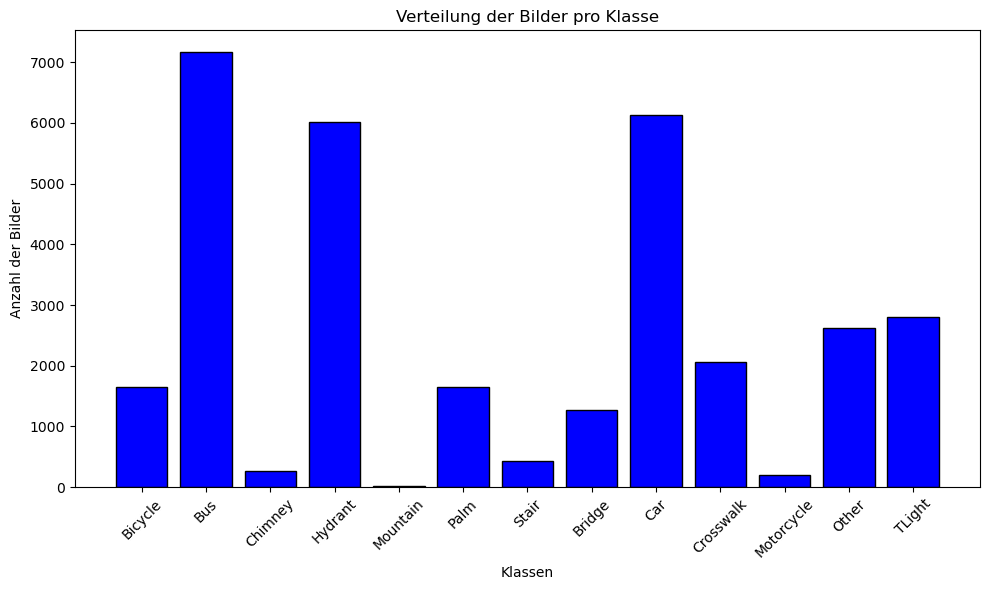

In [25]:
import os
import matplotlib.pyplot as plt

folder_image_counts = {folder: len(data['images']) for folder, data in folder_image_data.items()}
image_count = [folder['count'] for folder in folder_image_data.values()]
# Extract keys and values for plotting
folders = folder_image_counts.keys()
logger.info(f"folders: {folders}")
logger.info(f"folders 2: {folder_image_data.keys()}")
values = folder_image_counts.values()
logger.info(f"values: {values}")
logger.info(f"values 2: {image_count}")

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(folders, values, color='blue', edgecolor='black')
plt.xlabel('Klassen')
plt.ylabel('Anzahl der Bilder')
plt.title('Verteilung der Bilder pro Klasse')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Dateiendungen prüfen
Die Verteilung der Bildformate (z.B. PNG, JPG) wurde untersucht, um sicherzustellen, dass alle Formate berücksichtigt werden. Eine dritte Kategorie für alle anderen Dateiendungen wurde erstellt.

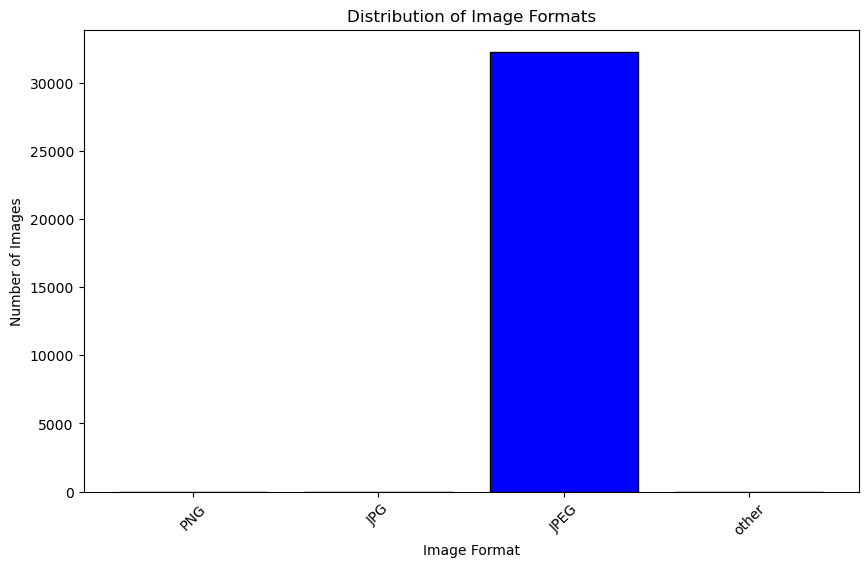

In [31]:
import matplotlib.pyplot as plt
from PIL import Image

def check_file_types():
    file_format_counts = {'PNG': 0, 'JPG': 0, 'JPEG': 0, 'other': 0}

    # Iterate through the folder_image_data dictionary
    for folder, data in folder_image_data.items():
        for img in data['images']:
            # Extract the image format from the image object
            img_format = img['format'] if img['format'] else 'other'

            # Update the count based on the image format
            if img_format in file_format_counts:
                file_format_counts[img_format] += 1
            else:
                file_format_counts['other'] += 1

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(file_format_counts.keys(), file_format_counts.values(), color='blue', edgecolor='black')
    plt.xlabel('Image Format')
    plt.ylabel('Number of Images')
    plt.title('Distribution of Image Formats')
    plt.xticks(rotation=45)
    plt.show()

check_file_types()

### Konvertierung in JPG

Die Bildformate JPG und PNG haben unterschiedliche Eigenschaften, insbesondere in Bezug auf die Kanäle (Channels), die sie verwenden. Daher wird auf ein Format konvertiert.

2024-08-26 14:33:31 - INFO - Converted images: 20503
INFO:__main__:Converted images: 20503


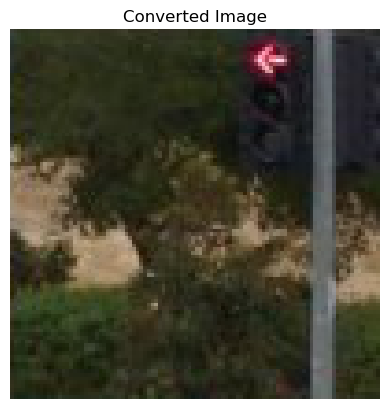

In [29]:
from PIL import Image
import matplotlib.pyplot as plt


logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
count = 0
for folder, data in folder_image_data.items():
    converted_images = []

    for img in data['images']:

        if img['format'] == 'PNG':
            count += 1
            img_rgb = img['image'].convert('RGB')
            converted_images.append({'image': img_rgb, 'format': 'JPEG'})

        else:
            converted_images.append(img)

    folder_image_data[folder]['images'] = converted_images

logger.info(f"Converted images: {count}")
if converted_images:
   plt.imshow(converted_images[0]['image'])
   plt.title('Converted Image')
   plt.axis('off')
   plt.show()

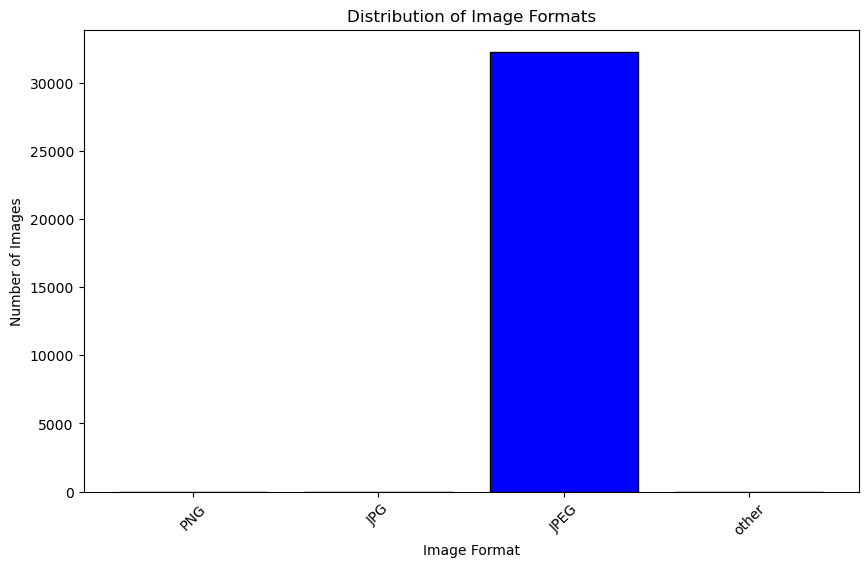

In [32]:
check_file_types()

### Bildgrößen und Auflösungen
Die Verteilung der Bildbreiten und -höhen wurde visualisiert, um ein besseres Verständnis der Größenverteilung innerhalb des Datensatzes zu erlangen. Diese Information ist entscheidend für die Entscheidung über die Bildskalierung und -normalisierung in späteren Schritten der Datenvorverarbeitung.

In [26]:
from PIL import Image
import logging


logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

image_sizes = set()

for folder, data in folder_image_data.items():
    for img_data in data['images']:
        img = img_data['image']
        size = img.size
        image_sizes.add(size)


unique_sizes = list(image_sizes)

print("Unique Image Sizes:", unique_sizes)
logger.info(f"Unique Image Sizes: {unique_sizes}")

2024-08-26 14:31:30 - INFO - Unique Image Sizes: [(100, 100), (120, 120)]
INFO:__main__:Unique Image Sizes: [(100, 100), (120, 120)]


Unique Image Sizes: [(100, 100), (120, 120)]


### Plotte ein Bild aus jedem Ordner
Ein visueller Eindruck des Datensatzes wurde durch das Anzeigen von Beispielbildern aus jedem Ordner gewonnen.

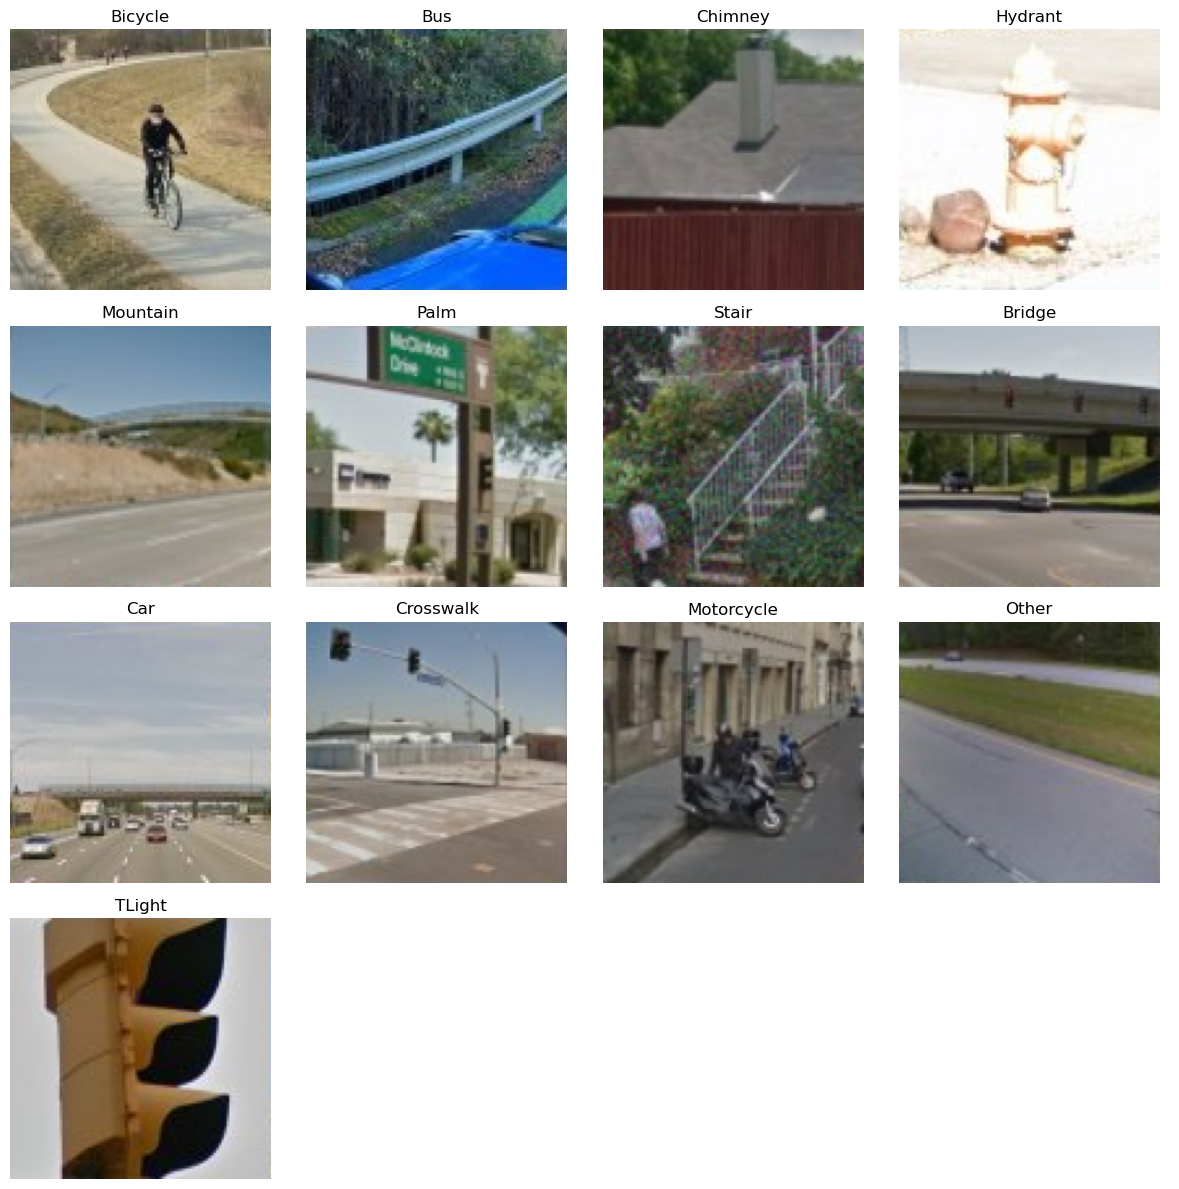

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

main_dir = '../Google-Recaptcha-V2-Images/'

fig, axes = plt.subplots(4, 4, figsize=(12, 12))

count = 0

for folder in folders:
    if count >= 16:
        break
    folder_path = os.path.join(main_dir, folder)
    if os.path.isdir(folder_path):
        files = os.listdir(folder_path)
        img_files = [f for f in files if f.endswith('png') or f.endswith('jpg')]

        if img_files:
            img_path = os.path.join(folder_path, img_files[1])
            img = mpimg.imread(img_path)

            row = count // 4
            col = count % 4

            axes[row, col].imshow(img)
            axes[row, col].set_title(folder)
            axes[row, col].axis('off')
            count += 1


for i in range(count, 16):
    row = i // 4
    col = i % 4
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

### Zusammenfassung und Schlussfolgerungen der EDA

**Erkenntnisse**

Verteilung der Bildanzahlen: Die meisten Bilder sind in der Kategorie „Car“ vorhanden, was möglicherweise darauf hinweist, dass diese Kategorie am häufigsten vorkommt oder für die reCAPTCHA-Herausforderungen am wichtigsten ist.

Kategorien mit wenig Bildern: Kategorien wie „Mountain“ haben nur sehr wenige Bilder, was zu einer Ungleichheit in der Datenmenge führen kann.

Mögliche Anomalien: Kategorien wie „Mountain“ könnten als mögliche Anomalien betrachtet werden, die weitere Aufmerksamkeit erfordern.

**Empfehlungen**

Datenbalance: Eine Datenbalancierung könnte notwendig sein, um sicherzustellen, dass das Modell gleichmäßig über alle Kategorien trainiert wird.

Weitere Datensammlung: Für Kategorien mit wenigen Bildern könnten zusätzliche Daten gesammelt werden, um die Modellleistung zu verbessern.

## 3. Erstellen eines maschinellen Datensatzes

Das Ziel dieses Abschnitts ist die Erzeugung eines Datensatzes, für die maschinelle Verarbeitung geeignet ist

1. Resizing (Veränderung der Bildgröße)
2. Resampling (Veränderung der Auflösung)
3. Encoding

4. Create Label

In [3]:
import os
%cd Google-Recaptcha-V2-Images
os.getcwd()

/Users/leonhenne/Repositories/nak-git/NAK-ML/Google-Recaptcha-V2-Images


'/Users/leonhenne/Repositories/nak-git/NAK-ML/Google-Recaptcha-V2-Images'

In [4]:
import tensorflow.keras as keras
train, validation = keras.utils.image_dataset_from_directory(
    os.getcwd(),
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(120, 120),
    shuffle=True,
    seed=42,
    validation_split=.2,
    subset='both',
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format='channels_last',
    verbose=True,
)

Found 32265 files belonging to 13 classes.
Using 25812 files for training.
Using 6453 files for validation.


2024-08-24 19:12:15.947345: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2024-08-24 19:12:15.947370: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-08-24 19:12:15.947377: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-08-24 19:12:15.947391: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-24 19:12:15.947407: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
logger.info(f"training dataset contains {len(train)} Batches")
logger.info(f"testing dataset contains {len(validation)} Batches")

for element in train:
  print(f"shape X_train: {element[0].shape}")
  print(f"shape Y_train: {element[1].shape}")
  break

2024-08-24 19:12:16 - INFO - training dataset contains 1614 Batches
2024-08-24 19:12:16 - INFO - testing dataset contains 404 Batches


shape X_train: (16, 120, 120, 3)
shape Y_train: (16, 13)


### 3.1 Manually create dataset

In [ ]:
categories = []

# Iterate over the directories in the current main dir
for category_dir in os.listdir(os.getcwd()):
    # Append the file path to the list
    if os.path.isdir(category_dir) and category_dir != '.git':  # Ensure it's a file and not a directory
        categories.append(category_dir)

print(categories)

In [ ]:
files = {}
for category in categories:
  files[category] = []
  for file_path in os.listdir(main_dir + category):
    files[category].append(file_path)

files[categories[0]][:5]

In [ ]:
import PIL.Image


rgba_image = PIL.Image.open('/content/drive/MyDrive/MADS2400/Google-Recaptcha-V2-Images/Bridge/Bridge$00c8fb02ed155a864575f69c4130359a.png')
input_arr = img_to_array(rgba_image)
logger.info(input_arr.shape)
rgb_image = rgba_image.convert('RGB')
input_arr = img_to_array(rgb_image)
logger.info(input_arr.shape)

In [ ]:
import numpy as np
from PIL import Image
rgba_image

s = []

for category in files.keys():
  for image in [files[category]][0]:
    # Load an image using PIL
    path = main_dir + category +'/'+ image

    image = load_img(path)
    input_arr = img_to_array(image)
    # if input_arr.shape[]
    # rgba_image = Image.open(path)
    # rgb_image = rgba_image.convert('RGB')
    if input_arr.shape not in s:
      print(input_arr.shape)
      s.append(input_arr.shape)

  logger.info(f'processed category {category}')
#   break
# input_arr = np.array(s)
# logger.info(f"s {s}")

In [ ]:
!pip list

## 4. Entwicklung einer neuronalen Netzarchitektur

### 4.1 Überprüfung der GPU Unterstützung

In [ ]:
import sys
import tensorflow.keras
import tensorflow as tf
import platform

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

### 4.2 ResNet

In [6]:
from keras.models import Sequential
from keras.layers import Convolution3D, Dense, Flatten, Dropout, GlobalAvgPool3D
resnet50v2 = keras.applications.ResNet50V2(
    include_top=True,
    weights=None,
    input_shape=(120, 120, 3),
    name='resnet50v2')

model = Sequential()
model.add(resnet50v2)
model.add(Dropout(0.5))
model.add(Dense(13, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ (None, 1000)           │    25,613,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 13)             │        13,013 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,626,813 (97.76 MB)

 Trainable params: 25,581,373 (97.59 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [7]:
from keras.callbacks import ModelCheckpoint, TensorBoard
import time

tensorboard_callback = TensorBoard(log_dir=f'../logs/captcha-{time.time()}',   
    histogram_freq=1, write_graph=True)

checkpoint_callback = ModelCheckpoint(
    filepath=f'../models/{time.time()}/'+'model-{epoch:02d}-{val_loss:.2f}.keras',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose =1)

callbacks= [tensorboard_callback,
            checkpoint_callback]

In [8]:
# loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
model.compile(optimizer="adam", 
              loss='categorical_crossentropy',
              metrics=["accuracy"])
model.fit(train, epochs=5, validation_data=validation, callbacks=callbacks)

Epoch 1/5


2024-08-24 19:13:13.363505: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1614/1614 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - accuracy: 0.2251 - loss: 2.3383
Epoch 1: val_accuracy improved from -inf to 0.21091, saving model to ../models/1724519581.579633/model-01-2.14.keras
1614/1614 ━━━━━━━━━━━━━━━━━━━━ 884s 517ms/step - accuracy: 0.2251 - loss: 2.3382 - val_accuracy: 0.2109 - val_loss: 2.1438
Epoch 2/5
1614/1614 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step - accuracy: 0.2244 - loss: 2.1539
Epoch 2: val_accuracy did not improve from 0.21091
1614/1614 ━━━━━━━━━━━━━━━━━━━━ 787s 487ms/step - accuracy: 0.2244 - loss: 2.1539 - val_accuracy: 0.2109 - val_loss: 2.1270
Epoch 3/5
1614/1614 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step - accuracy: 0.2243 - loss: 2.1301
Epoch 3: val_accuracy did not improve from 0.21091
1614/1614 ━━━━━━━━━━━━━━━━━━━━ 806s 500ms/step - accuracy: 0.2243 - loss: 2.1301 - val_accuracy: 0.2109 - val_loss: 2.1241
Epoch 4/5
1614/1614 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step - accuracy: 0.2242 - loss: 2.1239
Epoch 4: val_accuracy did not improve from 0.21091
1614/1614 ━━━━━